## Q3) Outlier Detection
Outlier detection (also known as '*anomaly detection*') is the process of finding observation points that are very distant from other observations. Such observation points are called outliers or anomalies. In this question,  you will employ simple visualization and statistical techniques to find the outliers and then, you will apply  outlier detection algorithms. 

You will be using the same **"customer_segemntation"** dataset that was used in the Q1. 


In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm

In [5]:
#loading the dataset
cust_df = pd.read_csv("customer_segmentation.csv")
print('Number of datapoints: {}'.format(cust_df.shape[0]))
cust_df.head()

Number of datapoints: 850


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
cust = cust_df.copy()
cust = cust.dropna()

### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

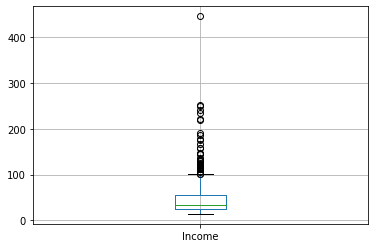

In [7]:
#Write code here

boxplot1 = cust.boxplot(column=['Income'])

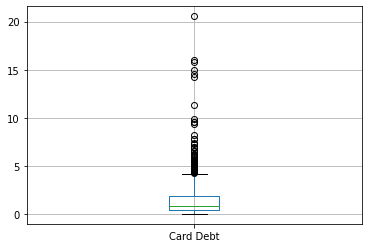

In [8]:
boxplot2 = cust.boxplot(column=['Card Debt'])

`Income`: Q1 is very close to minimum, and median is also closer to Q1. There is a large gap between Q3 and maximum. A number of outliers can also been seen.   
`Card Debt`: Similar to `Income`, Q1 is very close to minimum, and median is also closer to Q1. There is a large gap between Q3 and maximum. A number of outliers can also been seen.

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.

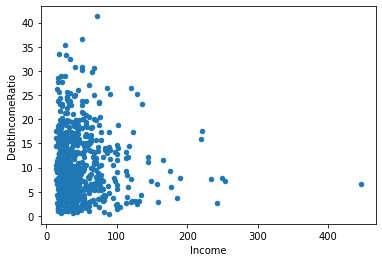

In [9]:
#Write code here

ax = cust.plot.scatter(x='Income', y='DebtIncomeRatio')

There is a very evident outlier (400+ `Income`) and another one (40+ `DebtIncomeRatio`). Other than that, some values between 200 to 300 `Income` may also be considered outliers.

### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [10]:
from scipy.stats import zscore
#Write code here

pd.set_option('expand_frame_repr', False) # Force DF rows to be printed in a single line
cols = ['Age', 'Other Debt', 'DebtIncomeRatio']
threshold = 3

count = 0
for col in cols:
    print('Outliers for {}'.format(col))
    z = np.abs(zscore(cust[col]))
    z = np.where(z > threshold)
    for ind in z:
        print(cust.iloc[ind])
        count = count + len(z[0])
    print()
print('Total outliers for {} using z-score method: {}'.format(col, count))

Outliers for Age
Empty DataFrame
Columns: [Customer Id, Age, Edu, Years Employed, Income, Card Debt, Other Debt, Defaulted, Address, DebtIncomeRatio]
Index: []

Outliers for Other Debt
     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted Address  DebtIncomeRatio
24            25   37    4              10     123      3.022      18.257        0.0  NBA018             17.3
78            79   41    2              21     145      3.237      14.453        0.0  NBA022             12.2
81            82   30    3               0      65      3.900      15.405        1.0  NBA008             29.7
198          199   47    3              16     221     15.792      23.104        1.0  NBA026             17.6
320          321   41    3              13      91      2.316      20.616        1.0  NBA013             25.2
350          351   47    1              31     136     14.231      17.185        1.0  NBA009             23.1
356          357   40    2              13   

* **What z-score threshold did you use to detect the outliers and why?**   
I used 3 as z-score threshold because for normal distrubutions almost 99.7% of the values are between the mean and 3 standard deviations. So I'm considering 0.3% of the values to be outliers.

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [11]:
#Write code here
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    k = 1.5
    Q1, Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (k * IQR)
    upper_range = Q3 + (k * IQR)
    return lower_range, upper_range

count = 0
for col in cols:
    print('Outliers for {}'.format(col))
    l_r, u_r = outlier_treatment(cust[col])
    temp = cust[(cust[col] < l_r) | (cust[col] > u_r)]
    count = count + temp.shape[0]
    print(temp)
    print()
print('Total outliers for {} using IQR method: {}'.format(col, count))

Outliers for Age
Empty DataFrame
Columns: [Customer Id, Age, Edu, Years Employed, Income, Card Debt, Other Debt, Defaulted, Address, DebtIncomeRatio]
Index: []

Outliers for Other Debt
     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted Address  DebtIncomeRatio
4              5   47    1              31     253      9.308       8.908        0.0  NBA008              7.2
24            25   37    4              10     123      3.022      18.257        0.0  NBA018             17.3
41            42   48    3              17     113      3.376      10.184        0.0  NBA026             12.0
43            44   37    5               9     177      0.888       9.555        0.0  NBA016              5.9
51            52   36    1              11      33      1.266       9.459        0.0  NBA002             32.5
54            55   29    3               5      70      3.176      10.754        1.0  NBA006             19.9
78            79   41    2              21   

* **What k-value did you use to detect the outliers and why?**   
I took 1.5 as k-value because in Gaussian distributions, about 99.72% of the whole data lies within three standard deviations of the mean. So by halving 3, we get 1.5

Refernce: https://medium.com/mytake/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**   
No method can objectively identify what is an outlier and what is not. These method can only show us that what datapoints may be suspected outliers, but it is up to us to decide whether to classify a datapoint as a outlier or not.   
We have total 850 datapoints, and as shown above both z-score and IQR try to interpret 0.03% or fewer data as outlier. z-score gave us total 22 outliers, whereas IQR classified 62 points as outliers.    
By visualizing the data, and by the assumption that 0.03% is outlier, z-score is better a metric for outlier detection for this dataset. 

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 


**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [12]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here

reduced_dataset = cust[["Income", "Other Debt"]]
scaled_data = MinMaxScaler().fit_transform(reduced_dataset)

**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [13]:
#Write your code here   

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=25, contamination='auto')
y_pred_final = clf.fit_predict(scaled_data)
count = 0
for v in y_pred_final:
    if v == -1:
        count = count + 1
print("Number of outliers: {}".format(count))

Number of outliers: 28


Run LOC algorithm multiple times with different values for the '**n_neighbors** 'paramater. 

In [14]:
for i in range(5, len(reduced_dataset), 20):
    count = 0
    clf = LocalOutlierFactor(n_neighbors=i, contamination='auto')
    y_pred = clf.fit_predict(scaled_data)
    for v in y_pred:
        if v == -1:
            count = count + 1
    print("Number of outliers: {} with n_neighbours={}".format(count, i))

Number of outliers: 11 with n_neighbours=5
Number of outliers: 28 with n_neighbours=25
Number of outliers: 43 with n_neighbours=45
Number of outliers: 53 with n_neighbours=65
Number of outliers: 64 with n_neighbours=85
Number of outliers: 73 with n_neighbours=105
Number of outliers: 82 with n_neighbours=125
Number of outliers: 93 with n_neighbours=145
Number of outliers: 99 with n_neighbours=165
Number of outliers: 112 with n_neighbours=185
Number of outliers: 120 with n_neighbours=205
Number of outliers: 134 with n_neighbours=225
Number of outliers: 149 with n_neighbours=245
Number of outliers: 161 with n_neighbours=265
Number of outliers: 166 with n_neighbours=285
Number of outliers: 169 with n_neighbours=305
Number of outliers: 167 with n_neighbours=325
Number of outliers: 166 with n_neighbours=345
Number of outliers: 156 with n_neighbours=365
Number of outliers: 148 with n_neighbours=385
Number of outliers: 138 with n_neighbours=405
Number of outliers: 133 with n_neighbours=425
Num

* **How did the results of LOC alogrithm vary by changing the value of 'n_neighbors'? What parameter value you ended up choosing and why?**

I started with 5 neigbours and ended with 685 neighbours. For each iteration, I incremented neigbours by 20. It can be seen that outliers with neighbours in the first half, peak at `neighbours=305` and then start decreasing.   
Assuming that zscore gave us a fair number of outliers in the previous sections, `neigbours=25` is a good parameter for this dataset because it produces comparable results to our zscore method.

**3.** Visualize the results using this function. You may also implement your own visualization function.

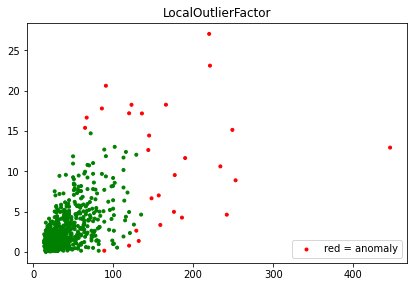

In [15]:
fig = plt.figure(figsize=(15,15))
def plot_model(labels, alg_name, X):
    ax = fig.add_subplot(3,2,1) 
    color_code = {'anomaly':'red', 'normal':'green'}
    color_code={-1:'red', 1:'green'}
    colors = [color_code[x] for x in labels]

    ax.scatter(X.iloc[:,0], X.iloc[:,1], color=colors, marker='.', label='red = anomaly')
    ax.legend(loc="lower right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name)

plot_model(y_pred_final, 'LocalOutlierFactor', reduced_dataset)

### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [16]:
#Write your code here

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=700, contamination='auto', behaviour='new')
y_pred  = clf.fit_predict(scaled_data)
count = 0
for v in y_pred:
    if v == -1:
        count = count + 1
print('Number of outlier: {}'.format(count))

Number of outlier: 70


* **What value did you use for the 'max_samples'?**

As number of max_samples increase, the number of outliers decrease. I used `max_samples=700` because after visualizing the results, it felt the most appropriate. The closer points were being considered inliers, whereas faraway points were being conisdered outliers.

**2.** Visualize the results using this function. You may also implement your own visualization function.

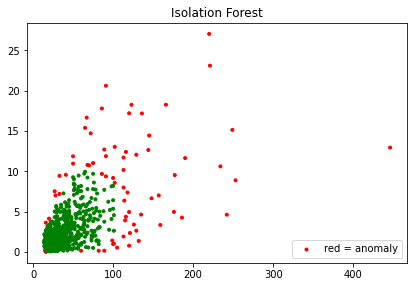

In [17]:
fig = plt.figure(figsize=(15,15))
plot_model(y_pred, 'Isolation Forest', reduced_dataset)

* **Compare the results from both LOC and Isolation Forest:** 



*Comparison:*   
It looks like LOF is better in indentifying outliers because there as no red dots near the cluster, but in the case of Isolation Forest, there are red dots very close to the cluster.  
Moreover, since Isolation Forest uses some randomized parameters, the number of outliers produced is different every time the algorithm is run.